In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img,img_to_array,ImageDataGenerator

2024-06-25 10:53:49.921247: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-25 10:53:49.921346: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-25 10:53:50.089205: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [13]:
pic_size=48
folder_path="/kaggle/input/face-expression-recognition-dataset/images/"
no_class=7

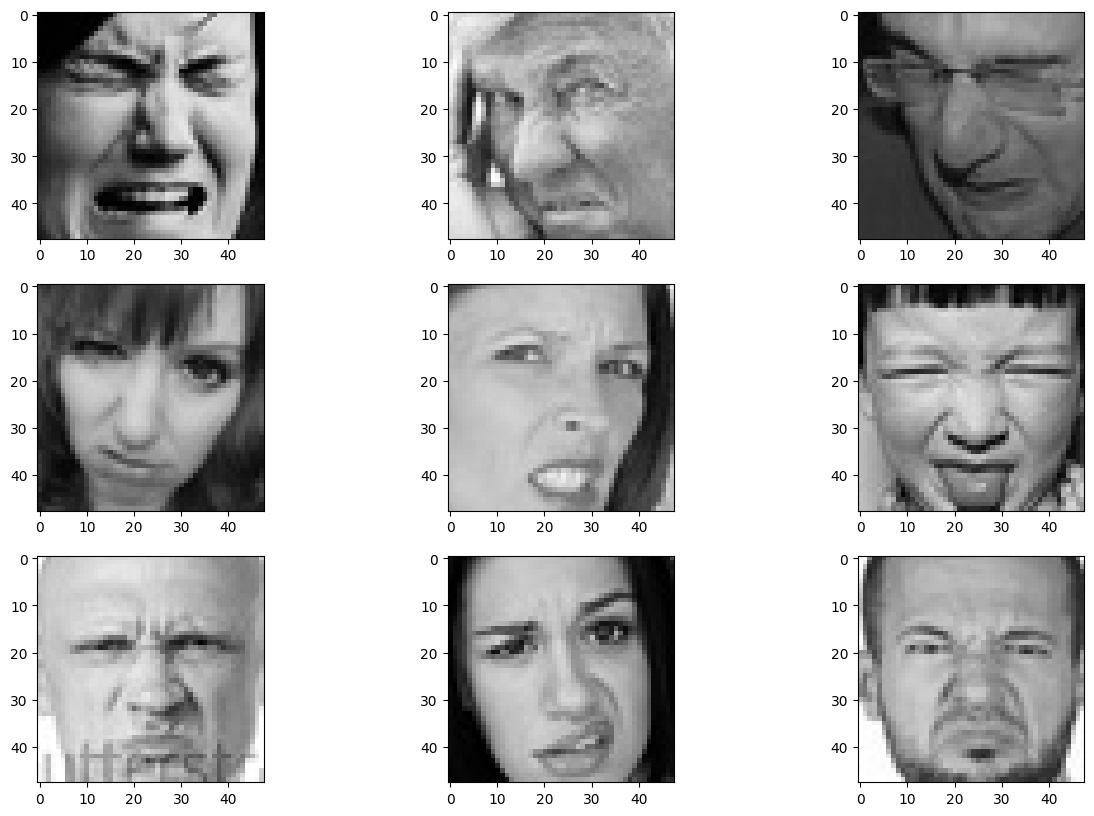

In [14]:
expression = "disgust"
plt.figure(figsize=(15,10))
for i in range(9):
    plt.subplot(3,3,i+1)
    img=load_img(folder_path+"train/"+expression+"/"+os.listdir(folder_path+"train/"+expression)[i],target_size=(pic_size,pic_size))
    plt.imshow(img)
plt.show()

In [15]:
batchsize=64
train_datagen = ImageDataGenerator(rescale=1./255,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True)
valid_datagen = ImageDataGenerator(rescale=1./255)

In [16]:
train_dataset =train_datagen.flow_from_directory(folder_path+"train",
                                                      target_size=(pic_size,pic_size),
                                                      batch_size=batchsize,
                                                       class_mode="categorical",
                                                       color_mode="grayscale",
                                                       shuffle=True
                                                      )
val_dataset = valid_datagen.flow_from_directory(folder_path+"validation",
                                                      target_size=(pic_size,pic_size),
                                                      batch_size=batchsize,
                                                       class_mode="categorical",
                                                       color_mode="grayscale",
                                                       shuffle=True
                                                      )

Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


In [35]:
model = tf.keras.models.Sequential()

In [36]:
input_shape = (48,48,1)

In [37]:
model.add(tf.keras.layers.Input(shape=input_shape))

In [38]:
model.add(tf.keras.layers.Conv2D(kernel_size=3,filters=128,activation="relu"))
model.add(tf.keras.layers.MaxPool2D(strides=2,pool_size=2))
model.add(tf.keras.layers.Dropout(0.25))

In [39]:
model.add(tf.keras.layers.Conv2D(kernel_size=3,filters=256,activation="relu"))
model.add(tf.keras.layers.MaxPool2D(strides=2,pool_size=2))
model.add(tf.keras.layers.Dropout(0.25))

In [40]:
model.add(tf.keras.layers.Conv2D(kernel_size=3,filters=512,activation="relu"))
model.add(tf.keras.layers.MaxPool2D(strides=2,pool_size=2))
model.add(tf.keras.layers.Dropout(0.25))

In [41]:
model.add(tf.keras.layers.Conv2D(kernel_size=3,filters=512,activation="relu"))
model.add(tf.keras.layers.MaxPool2D(strides=2,pool_size=2))
model.add(tf.keras.layers.Dropout(0.25))

In [42]:
model.add(tf.keras.layers.Flatten())

In [43]:
model.add(tf.keras.layers.Dense(units=512,activation="relu"))
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Dense(units=256,activation="relu"))
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Dense(units=no_class,activation="softmax"))

In [45]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [52]:
history = model.fit(x=train_dataset,epochs=20, validation_data=val_dataset)

Epoch 1/20
451/451 ━━━━━━━━━━━━━━━━━━━━ 75s 163ms/step - accuracy: 0.5364 - loss: 1.2219 - val_accuracy: 0.5753 - val_loss: 1.1236
Epoch 2/20
451/451 ━━━━━━━━━━━━━━━━━━━━ 41s 89ms/step - accuracy: 0.5332 - loss: 1.2203 - val_accuracy: 0.5757 - val_loss: 1.1187
Epoch 3/20
451/451 ━━━━━━━━━━━━━━━━━━━━ 42s 91ms/step - accuracy: 0.5345 - loss: 1.2178 - val_accuracy: 0.5843 - val_loss: 1.1003
Epoch 4/20
451/451 ━━━━━━━━━━━━━━━━━━━━ 42s 91ms/step - accuracy: 0.5370 - loss: 1.2241 - val_accuracy: 0.5865 - val_loss: 1.0994
Epoch 5/20
451/451 ━━━━━━━━━━━━━━━━━━━━ 41s 91ms/step - accuracy: 0.5437 - loss: 1.2131 - val_accuracy: 0.5777 - val_loss: 1.1131
Epoch 6/20
451/451 ━━━━━━━━━━━━━━━━━━━━ 42s 93ms/step - accuracy: 0.5471 - loss: 1.2000 - val_accuracy: 0.5886 - val_loss: 1.0903
Epoch 7/20
451/451 ━━━━━━━━━━━━━━━━━━━━ 62s 137ms/step - accuracy: 0.5440 - loss: 1.1960 - val_accuracy: 0.5918 - val_loss: 1.0922
Epoch 8/20
451/451 ━━━━━━━━━━━━━━━━━━━━ 57s 124ms/step - accuracy: 0.5495 - loss: 1.1934

In [53]:

tf.keras.models.save_model(model,"face.keras")

In [68]:
val_dataset.class_indices

{'angry': 0,
 'disgust': 1,
 'fear': 2,
 'happy': 3,
 'neutral': 4,
 'sad': 5,
 'surprise': 6}

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
surprise
